In [1]:
from os.path import join, abspath
from os import getcwd

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
from skimage.transform import resize

In [2]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 0
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
data_dir = abspath(join(getcwd(), '../../'))

#### Load results from covariance analysis for RFs from natural images stimuli

In [4]:
with open(data_dir + '/models/results/covariance_analysis/v1_nat_img_covariance.pickle', 'rb') as file:
    results = pickle.load(file)
cov_mat = results['covariance']
evecs = results['evecs']
evals = results['evals']

#### Plot the covariance matrices

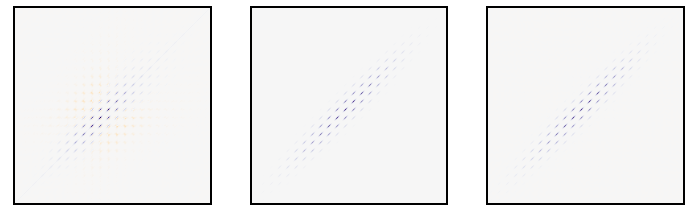

In [5]:
keys = ['data', 'model', 'finite']
fig = plt.figure(figsize=(12, 4))
for i, key in enumerate(keys): 
    ax = fig.add_subplot(1, 3, i + 1)
    plot = plt.imshow(np.flip(cov_mat[key], axis=1), cmap='PuOr') # PiYG_r
    plt.clim(-5, 5)
    plt.xticks([])
    plt.yticks([])
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/covmat_v1_nat_img.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches = 0.015)

# save the colorbar separately
fig, ax = plt.subplots(figsize=(8, 4))
cbar = plt.colorbar(plot, ax=ax)
cbar.set_ticks([])
ax.remove()
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/covmat_v1_colorbar.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0)

#### Plot the eigenvalues

Data: 100 evecs explain 0.62 variance
Model: 100 evecs explain 0.93 variance
Sampled neurons: 100 evecs explain 0.93 variance


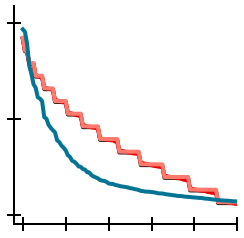

In [8]:
evals['data'] /= np.sum(evals['data'])
evals['model'] /= np.sum(evals['model'])
evals['finite'] /= np.sum(evals['finite'])
evals['analytical'] /= np.sum(evals['analytical'])


t = 100
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.semilogy(np.flip(evals['model'])[:t], '-', lw=4, c='#000000', alpha=1)
plt.semilogy(np.flip(evals['finite'])[:t], '-', lw=4, c='#e50000', alpha=1)
plt.semilogy(np.flip(evals['analytical'])[:t], '-', lw=4, c='#ff796c', alpha=1)
plt.semilogy(np.flip(evals['data'])[:t], '-', lw=4, c='#047495', alpha=1)
# plt.ylabel('Variance')
# plt.xlabel('PC dimension')

# format ticks
plt.xlim(-4, 100)
plt.ylim(8E-4, 1.5E-1)
plt.xticks(np.arange(0, 110, 20))
ax.set_xticklabels([])
ax.set_yticklabels([])


# plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/evals_v1_nat_img.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0)

t = 100
print('Data: %d evecs explain %0.2f variance' % (t, np.sum(evals['data'][-t:])))
print('Model: %d evecs explain %0.2f variance' % (t, np.sum(evals['model'][-t:])))
print('Sampled neurons: %d evecs explain %0.2f variance' % (t, np.sum(evals['finite'][-t:])))

#### Save individual eigenvectors

In [20]:
dim = [24, 27]
keys = ['data', 'model', 'finite', 'analytical']
signs = {'data':1, 'model':-1, 'finite': 1, 'analytical':-1}


fig = plt.figure(figsize=(4, 4))
for i, key in enumerate(keys):
    sign = signs[key]
    for i in range(15):
        if key != 'analytical':
            ev = evecs[key][:, -i - 1]
            img = ev.reshape(dim[0], dim[1])
        elif key == 'analytical':
            ev = evecs[key][i]
            img = ev.reshape(240, 260)
        ax = fig.add_subplot(111)
        plt.imshow(img * sign, cmap='PuOr')
        plt.clim(-0.2, 0.2)
        plt.axis('off')
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/evecs_v1_nat_img/evecs_%s_%d.png' %(key, i), 
                    dpi=200, transparent=True,
                    bbox_inches = 'tight', pad_inches=0)
        plt.close()

#### Plot all the eigenvectors

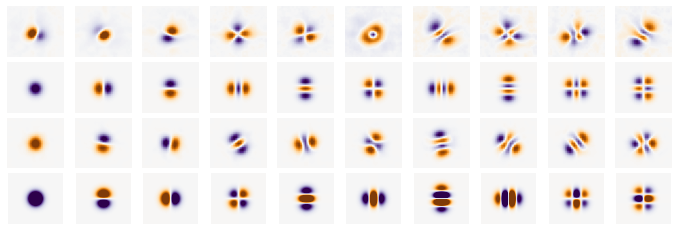

In [16]:
dim = (24, 27)

# sign flips
t =[-1, 1, 1, -1, -1, 1, 1, 1, 1, 1] # model & finite sign
u = [1, 1, 1, 1, -1, 1, 1, 1, 1, 1] # analytical sign


# order
m = [0, 1, 2, 3, 4, 5, 8, 9, 6, 7] # model order
a = [0, 2, 1, 4, 5, 3, 9, 8, 6, 7] # analytical order

factor = 1 # resize factor
fig = plt.figure(figsize=(12, 4))
for i in range(10):
    ax = fig.add_subplot(4, 10, i + 1)
    img = evecs['data'][:, - i-1].reshape(dim)
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img, cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 10 + i + 1)
    img = evecs['model'][:, -i-1].reshape(dim)
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img, cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 20 + i + 1)
    img = evecs['finite'][:,  - i - 1].reshape(dim)
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img, cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 30 + i + 1)
    img = evecs['analytical'][i].reshape(240, 260)
    plt.imshow(img, cmap='PuOr')
    plt.clim(-0.3, 0.3)
    plt.axis('off')

# plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/evecs_v1_nat_img.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches=0)